In [1]:
import pandas as pd 
import itertools # for confusion matrix
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table('drugsCom_raw (1).tsv')
df.sample(10)

Unnamed: 0                         drugName                 condition  \
128437       78289                       Tapentadol                      Pain   
48290       219883                    Amitriptyline               ibromyalgia   
41140        61661                       Citalopram                Depression   
56331        92821                     Vortioxetine  Major Depressive Disorde   
121354      132788                 Prochlorperazine           Nausea/Vomiting   
12872       146228                         Suboxone         Opiate Dependence   
105487      146166                         Suboxone         Opiate Dependence   
43418        91695                 MetroGel-Vaginal       Bacterial Vaginitis   
133989      187495  Monistat 3-Day Combination Pack   Vaginal Yeast Infection   
99927        25312                    Flector Patch                      Pain   

                                                   review  rating  \
128437  "I have been happy with Nucynta. I have been u...     9.0   
48290   "Wonderful for my fibromyalgia. It helps reduc...    10.0   
41140   "I have severe anxiety and depression. The las...     8.0   
56331   "Terrible drug.  Was so nauseated every day fo...     1.0   
121354  "Read the side effects carefully. I had a seve...     1.0   
12872   "As long as you follow the doctor&#039;s instr...    10.0   
105487  "I have been taking Suboxone for 3-1/2 years. ...    10.0   
43418   "I&#039;ve been getting bacteria infections on...     1.0   
133989  "Im 18yrs old and 34weeks pregnant and this is...    10.0   
99927   "I had shoulder surgery 4 months ago, and hone...    10.0   

                     date  usefulCount  
128437   October 12, 2010           86  
48290    October 19, 2016           44  
41140        May 16, 2016           15  
56331   September 1, 2017           11  
121354    August 18, 2014           24  
12872      August 9, 2010           38  
105487     March 14, 2011           11  
43418      March 25, 2016           17  
133989    August 19, 2015            4  
99927     August 28, 2015           17

In [3]:
'''df = df.drop('Unnamed: 0', axis=1)
df'''

"df = df.drop('Unnamed: 0', axis=1)\ndf"

# AUTO EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv

In [5]:
sweet_report = sv.analyze(df)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, drugName, condition, review, rating, date, usefulCount]
Index: []

In [8]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [9]:
df.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [11]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

# EDA

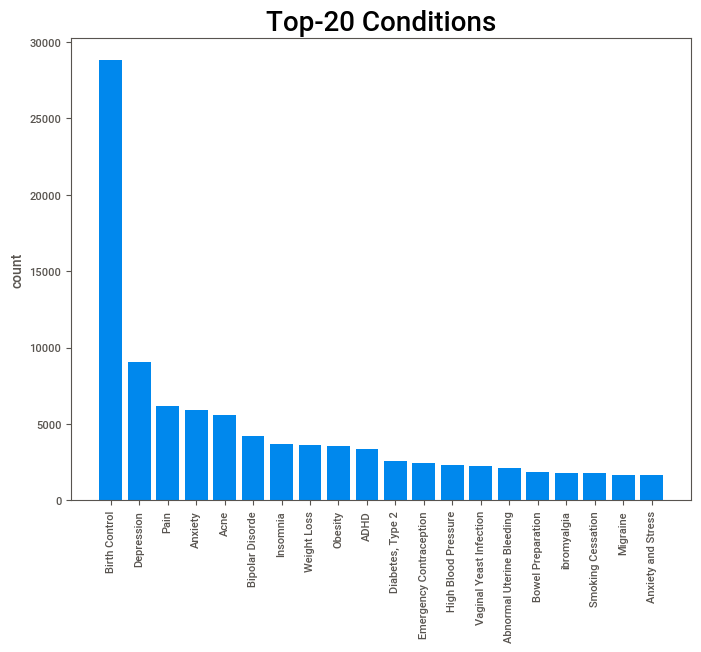

In [12]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(8,6))
conditions = df['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [13]:
# checking for 3 conditions needed
condition1 = ['Depression','High Blood Pressure','Diabetes, Type 2']
df1=df[df['condition'].isin(condition1)]
df1

Unnamed: 0        drugName            condition  \
11           75612  L-methylfolate           Depression   
31           96233      Sertraline           Depression   
44          121333     Venlafaxine           Depression   
50          156544     Dulaglutide     Diabetes, Type 2   
67          131909      Effexor XR           Depression   
...            ...             ...                  ...   
161251      198130      Metoprolol  High Blood Pressure   
161258       34443        Bystolic  High Blood Pressure   
161278       86533        Invokana     Diabetes, Type 2   
161286       93069    Vortioxetine           Depression   
161290      103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  
11         March 9, 2017           54  
31           May 7, 2011            3  
44        April 27, 2016            3  
50      October 24, 2017           24  
67         June 20, 2013          166  
...                  ...          ...  
161251     July 15, 2009           39  
161258     July 18, 2009           25  
161278  October 23, 2015           47  
161286     July 17, 2016           33  
161290  February 7, 2010           18  

[13944 rows x 7 columns]

In [14]:
df1['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [15]:
df1.loc[df1['rating'] == 1, :]['drugName'].value_counts().head(10)

Lisinopril      74
Venlafaxine     73
Vortioxetine    62
Cymbalta        53
Bupropion       51
Duloxetine      49
Effexor         48
Trulicity       47
Vilazodone      45
Sertraline      44
Name: drugName, dtype: int64

In [16]:
#check number of unique values in drugName
print(df1['drugName'].nunique())

#check number of unique values in condition
print(df1['condition'].nunique())

334
3


In [17]:
ratings_ = df1['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/df.shape[0])
print(ratings_)

   rating  counts   percent
0    10.0    3763  2.332963
1     9.0    2468  1.530097
2     1.0    1802  1.117194
3     8.0    1795  1.112854
4     7.0     995  0.616874
5     5.0     756  0.468701
6     6.0     680  0.421583
7     2.0     645  0.399883
8     3.0     582  0.360825
9     4.0     458  0.283948


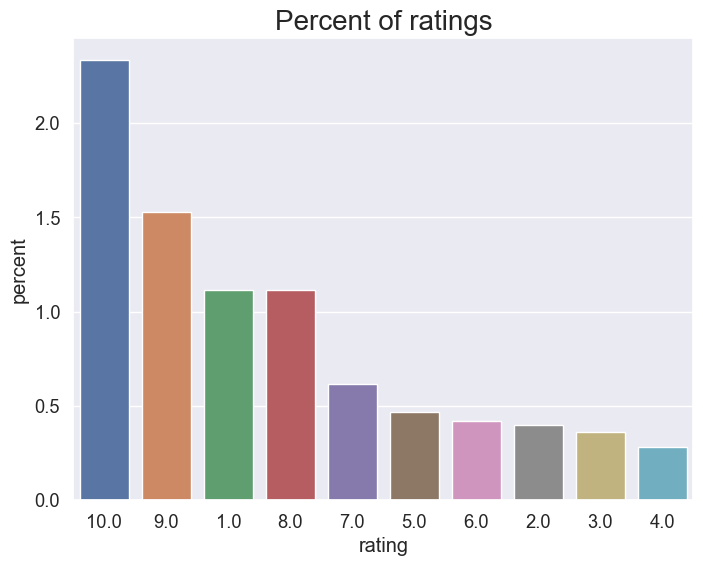

In [18]:
# Setting the Parameter
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [8, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Percent of ratings',fontsize=20)
plt.show()

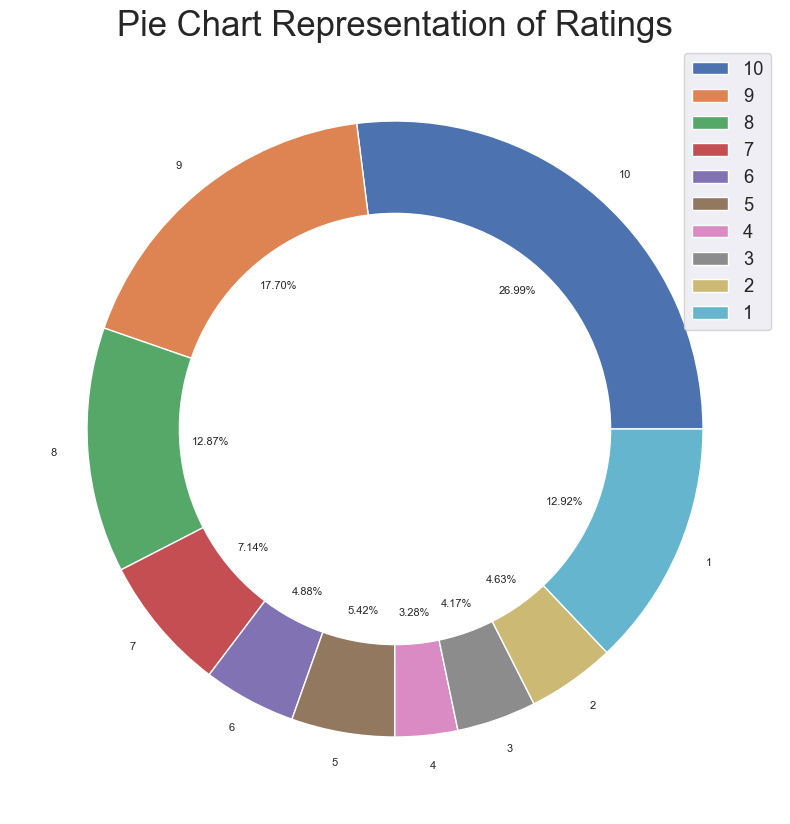

In [19]:
size = [3763, 2468, 1795, 995, 680, 756, 458, 582, 645, 1802]
labels = "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, autopct = '%.2f%%', textprops={'fontsize': 8})
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

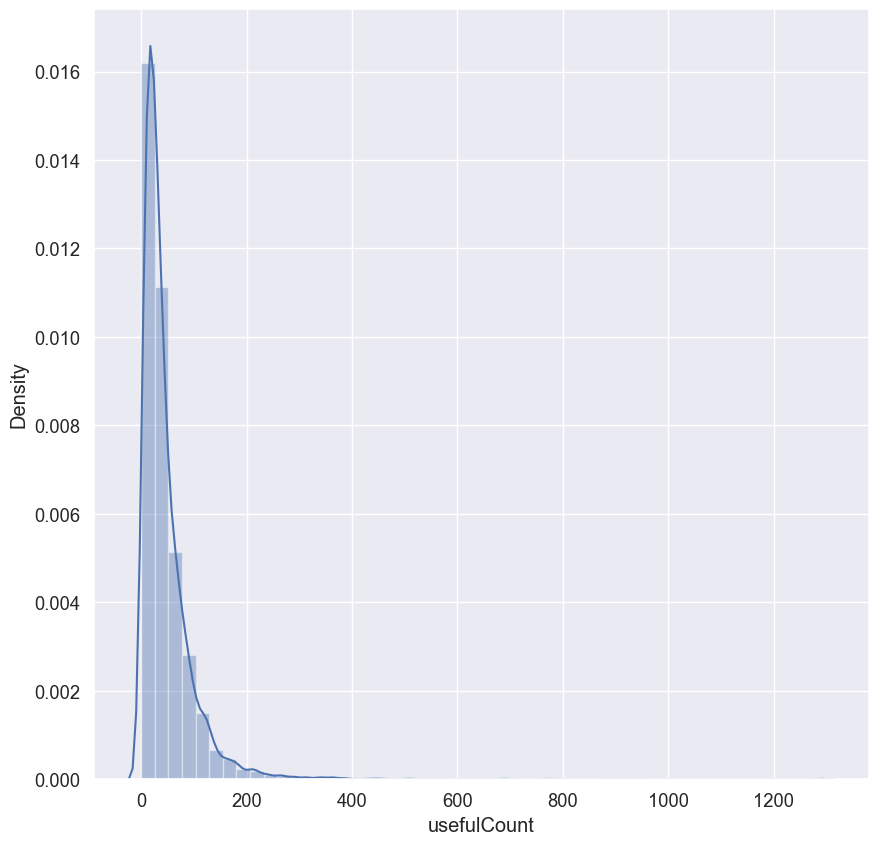

In [20]:
#Plot a distplot of usefulCount
sns.distplot(df1['usefulCount'])
plt.show()

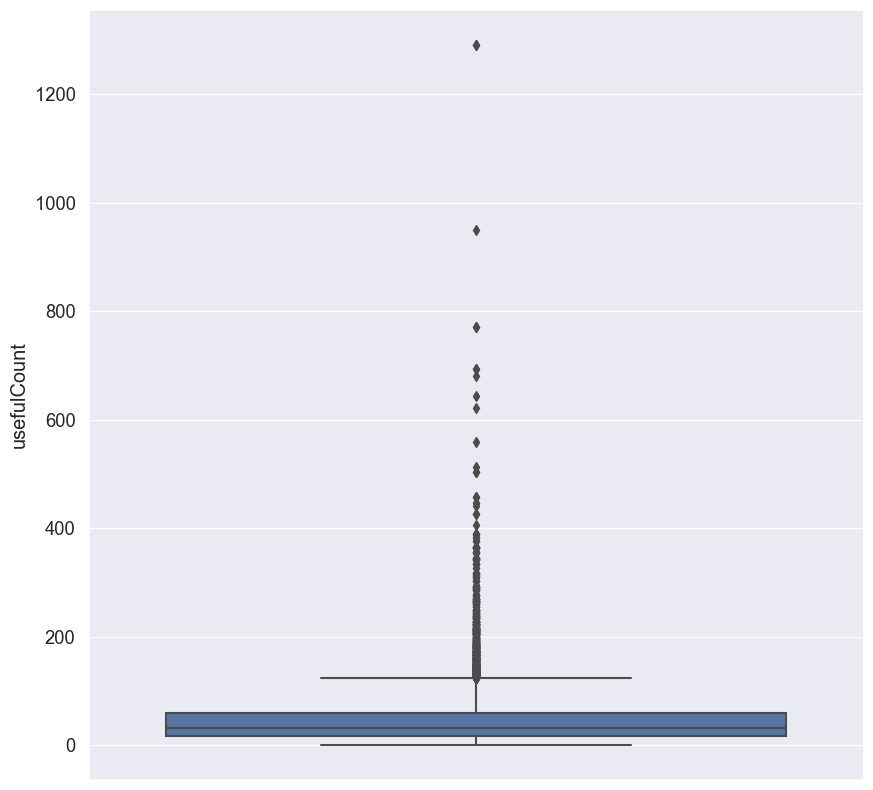

In [21]:
#check the descriptive summary
sns.boxplot(y = df1['usefulCount'])
plt.show()

Some drugs have extreme useful counts.

We can see that there are huge outliers present in our dataset.

In [22]:
# count the number of unique drugs for the condition "depression"
depression_drugs = df1.loc[df1['condition'] == 'Depression', 'drugName'].nunique()

print(f"There are {depression_drugs} unique drugs in the 'drugName' column for the condition 'Depression'.")

There are 105 unique drugs in the 'drugName' column for the condition 'Depression'.


In [23]:
# select the drug names for the condition "depression"
depression_drugs = df.loc[df['condition'] == 'Depression', 'drugName'].unique()

print("The following drugs are associated with the condition 'Depression':")
for drug in depression_drugs:
    print(drug)

The following drugs are associated with the condition 'Depression':
L-methylfolate
Sertraline
Venlafaxine
Effexor XR
Wellbutrin
Aripiprazole
Desvenlafaxine
Fluoxetine
Bupropion
Trintellix
Trazodone
Pristiq
Levomilnacipran
Cymbalta
Escitalopram
Nardil
Zoloft
Methylphenidate
Wellbutrin XL
Lexapro
Viibryd
Effexor
Zyprexa
Duloxetine
Rexulti
Quetiapine
Citalopram
St. john's wort
Vilazodone
Emsam
Celexa
Vortioxetine
Paxil
Prozac
Lamotrigine
Isocarboxazid
Limbitrol
Paroxetine
Deplin
Serzone
Xanax
Parnate
Elavil
Wellbutrin SR
Remeron
Brexpiprazole
S-adenosylmethionine
Nefazodone
Abilify
Amitriptyline
Selegiline
Alprazolam
Tramadol
Fluvoxamine
Seroquel
Olanzapine
Oleptro
Symbyax
Mirtazapine
Desipramine
Seroquel XR
Imipramine
Phenelzine
Nortriptyline
Modafinil
Tranylcypromine
Nuvigil
Fetzima
Risperidone
Tryptophan
Niacin
Paxil CR
Desyrel
Marplan
Lithium
Anafranil
Fluoxetine / olanzapine
Remeron SolTab
Doxepin
Armodafinil
Amoxapine
Budeprion XL
Provigil
Aplenzin
Lisdexamfetamine
Clomipramine
Amit

In [24]:
# count the number of unique drugs for the condition "High Blood Pressure"
hbp_drugs = df1.loc[df1['condition'] == 'High Blood Pressure', 'drugName'].nunique()

print(f"There are {hbp_drugs} unique drugs in the 'drugName' column for the condition 'High Blood Pressure'.")

There are 140 unique drugs in the 'drugName' column for the condition 'High Blood Pressure'.


In [25]:
# select the drug names for the condition "High Blood Pressure"
hbp_drugs = df1.loc[df1['condition'] == 'High Blood Pressure', 'drugName'].unique()

print("The following drugs are associated with the condition 'High Blood Pressure':")
for drug in hbp_drugs:
    print(drug)

The following drugs are associated with the condition 'High Blood Pressure':
Amlodipine / olmesartan
Lisinopril
Metoprolol
Prazosin
Toprol-XL
Losartan
Hydrochlorothiazide
Azor
Diovan
Ramipril
Valsartan
Diltiazem
Propranolol
Sectral
Hydrochlorothiazide / telmisartan
Bystolic
Bisoprolol / hydrochlorothiazide
Nebivolol
Hydrochlorothiazide / lisinopril
Amlodipine
Amlodipine / benazepril
Atenolol
Olmesartan
Irbesartan
Chlorthalidone
Benicar HCT
Doxazosin
Cozaar
Catapres-TTS
Furosemide
Benicar
Atacand
Telmisartan
Cardizem LA
Exforge
Zestril
Carvedilol
Nitro-Dur
Ziac
Clonidine
Hydrochlorothiazide / olmesartan
Avalide
Lotrel
Tenex
Hydralazine
Amlodipine / hydrochlorothiazide / olmesartan
Candesartan
Micardis
Spironolactone
Prinzide
Valturna
Hyzaar
Lotensin
Atenolol / chlorthalidone
Guanfacine
Micardis HCT
Hydrochlorothiazide / valsartan
Avapro
Hydrochlorothiazide / moexipril
Hydrochlorothiazide / triamterene
Zestoretic
Azilsartan medoxomil
Hydrochlorothiazide / losartan
Norvasc
Pindolol
Terazo

In [26]:
# count the number of unique drugs for the condition "Diabetes, Type 2"
Diabetes_drugs = df1.loc[df1['condition'] == 'Diabetes, Type 2', 'drugName'].nunique()
print(f"There are {Diabetes_drugs} unique drugs in the 'drugName' column for the condition 'Diabetes, Type 2'.")

There are 89 unique drugs in the 'drugName' column for the condition 'Diabetes, Type 2'.


In [27]:
# select the drug names for the condition "Diabetes, Type 2"
Diabetes_drugs = df1.loc[df1['condition'] == 'Diabetes, Type 2', 'drugName'].unique()

print("The following drugs are associated with the condition 'Diabetes, Type 2':")
for drug in Diabetes_drugs:
    print(drug)

The following drugs are associated with the condition 'Diabetes, Type 2':
Dulaglutide
Liraglutide
Empagliflozin
Victoza
Exenatide
Bydureon
Trulicity
Sitagliptin
Toujeo
Empagliflozin / linagliptin
Jardiance
Dapagliflozin
Tresiba
Canagliflozin
Kombiglyze XR
Invokana
Metformin
Levemir
Insulin glargine
Afrezza
Januvia
Amaryl
Byetta
Farxiga
Janumet
Lantus Solostar
Glipizide
Insulin lispro
Onglyza
Rosiglitazone
Prandin
Albiglutide
Glimepiride
Insulin glulisine
Glimepiride / pioglitazone
GlipiZIDE XL
ActoPlus Met
Actos
Glucotrol
Avandia
Tradjenta
Glucophage
Insulin detemir
Saxagliptin
Insulin degludec
Glyburide
Repaglinide
Pioglitazone
Linagliptin
Humulin N
Avandamet
Tanzeum
Exubera
Colesevelam
Lantus
Glyxambi
Novolin 70 / 30
Jentadueto
Welchol
Insulin inhalation, rapid acting
Novolog
Insulin aspart
Glyburide / metformin
Alogliptin
Basaglar
Insulin isophane / insulin regular
Insulin lispro / insulin lispro protamine
Xigduo XR
Synjardy
Glucovance
Metformin / sitagliptin
Chromium picolinate
Gli

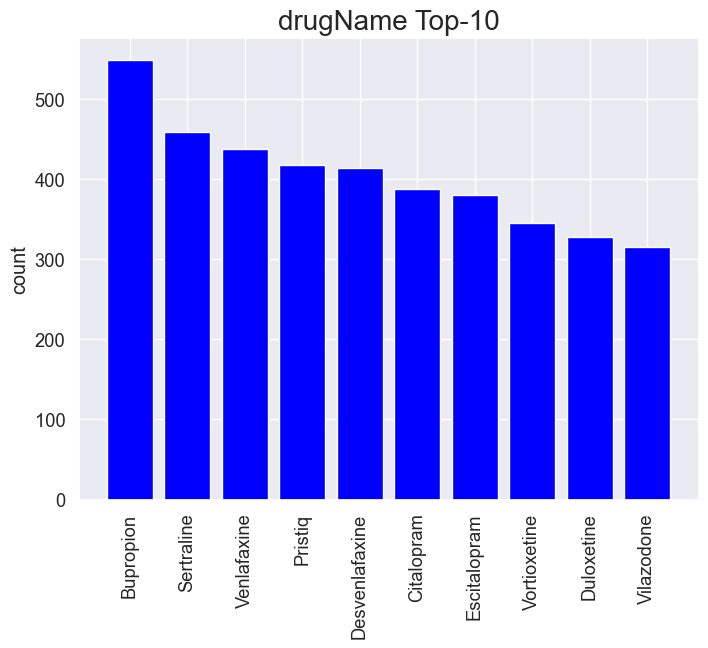

In [28]:
#plot a bargraph to check top 10 drugName
plt.figure(figsize=(8,6))
drugName_top = df1['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

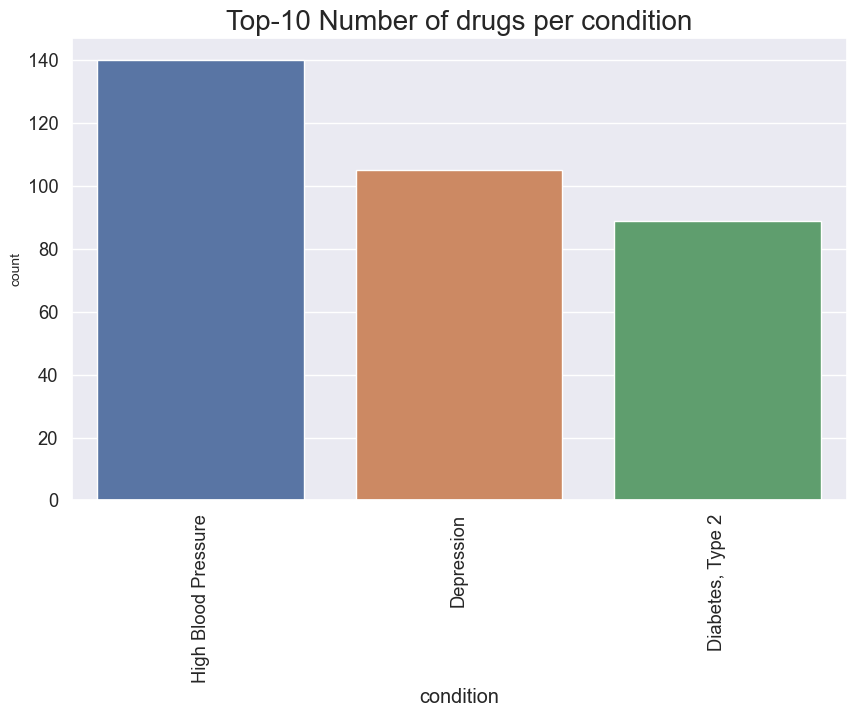

In [29]:
#lets check the number of drugs present in our dataset condition wise
conditions_data = df1.groupby('condition')['drugName'].nunique().sort_values(ascending=False)


# Setting the Parameter
condition_data_top_10 = conditions_data.head(10)
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [10, 6]
sns.barplot(x = condition_data_top_10.index, y = condition_data_top_10.values)
plt.title('Top-10 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

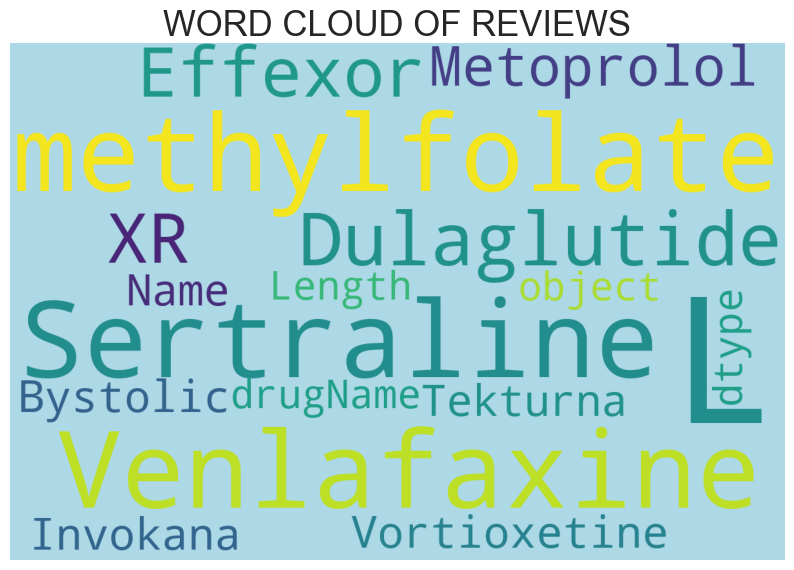

In [30]:
# drug name word clous

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue',stopwords = stopwords,width = 1200, height = 800).generate(str(df1['drugName']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [31]:
# A new column named Review_Sentiment based on rating

df1.loc[(df1['rating'] >= 5), 'Review_Sentiment'] = 1
df1.loc[(df1['rating'] < 5), 'Review_Sentiment'] = 0

df1['Review_Sentiment'].value_counts()

1.0    10457
0.0     3487
Name: Review_Sentiment, dtype: int64

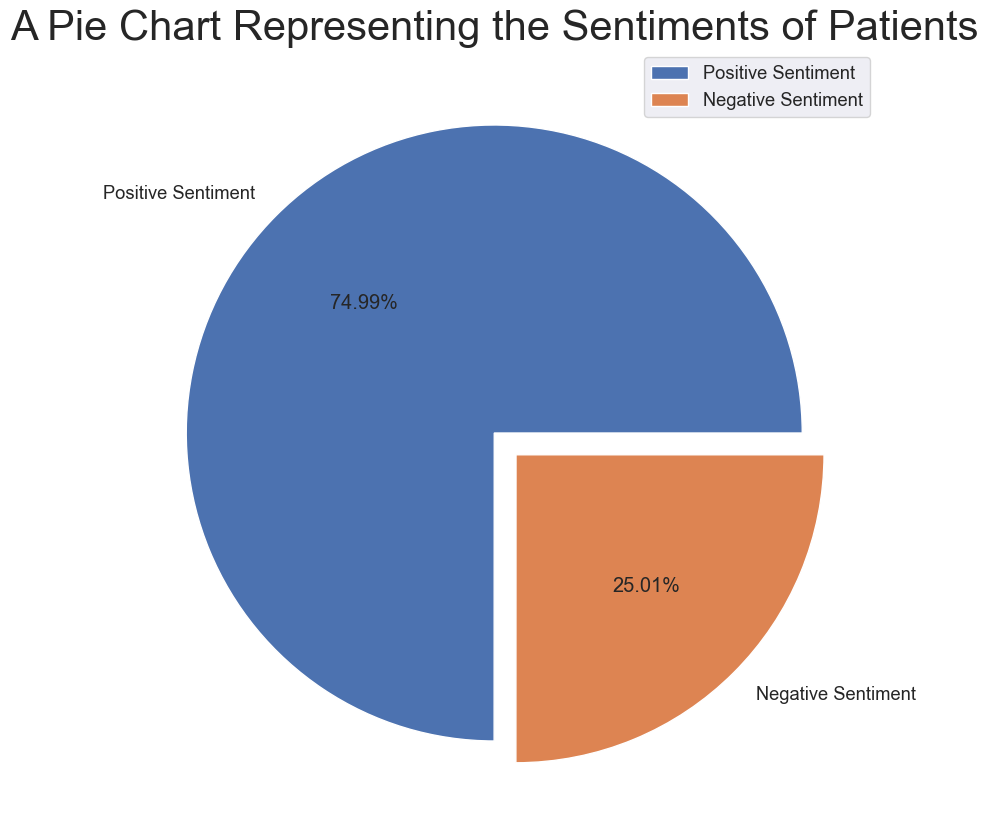

In [32]:
# a pie chart to represent the sentiments of the patients

size = [10457, 3487]
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size,labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [33]:
X = df1.drop(['Unnamed: 0','rating','date','usefulCount', 'Review_Sentiment'],axis=1)
X

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  
11      "I have taken anti-depressants for years, with...  
31      "1 week on Zoloft for anxiety and mood swings....  
44      "my gp started me on Venlafaxine yesterday to ...  
50      "Hey Guys,  It&#039;s been 4 months since my l...  
67      "This medicine saved my life. I was at my wits...  
...                                                   ...  
161251  "It is fourth blood pressure pill for me. It f...  
161258  "While on Bystolic my feet and arms were numb....  
161278  "I just got diagnosed with type 2. My doctor p...  
161286  "This is the third med I&#039;ve tried for anx...  
161290  "I have only been on Tekturna for 9 days. The ...  

[13944 rows x 3 columns]

In [34]:
# segregating dataframe for analyzing individual condition
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

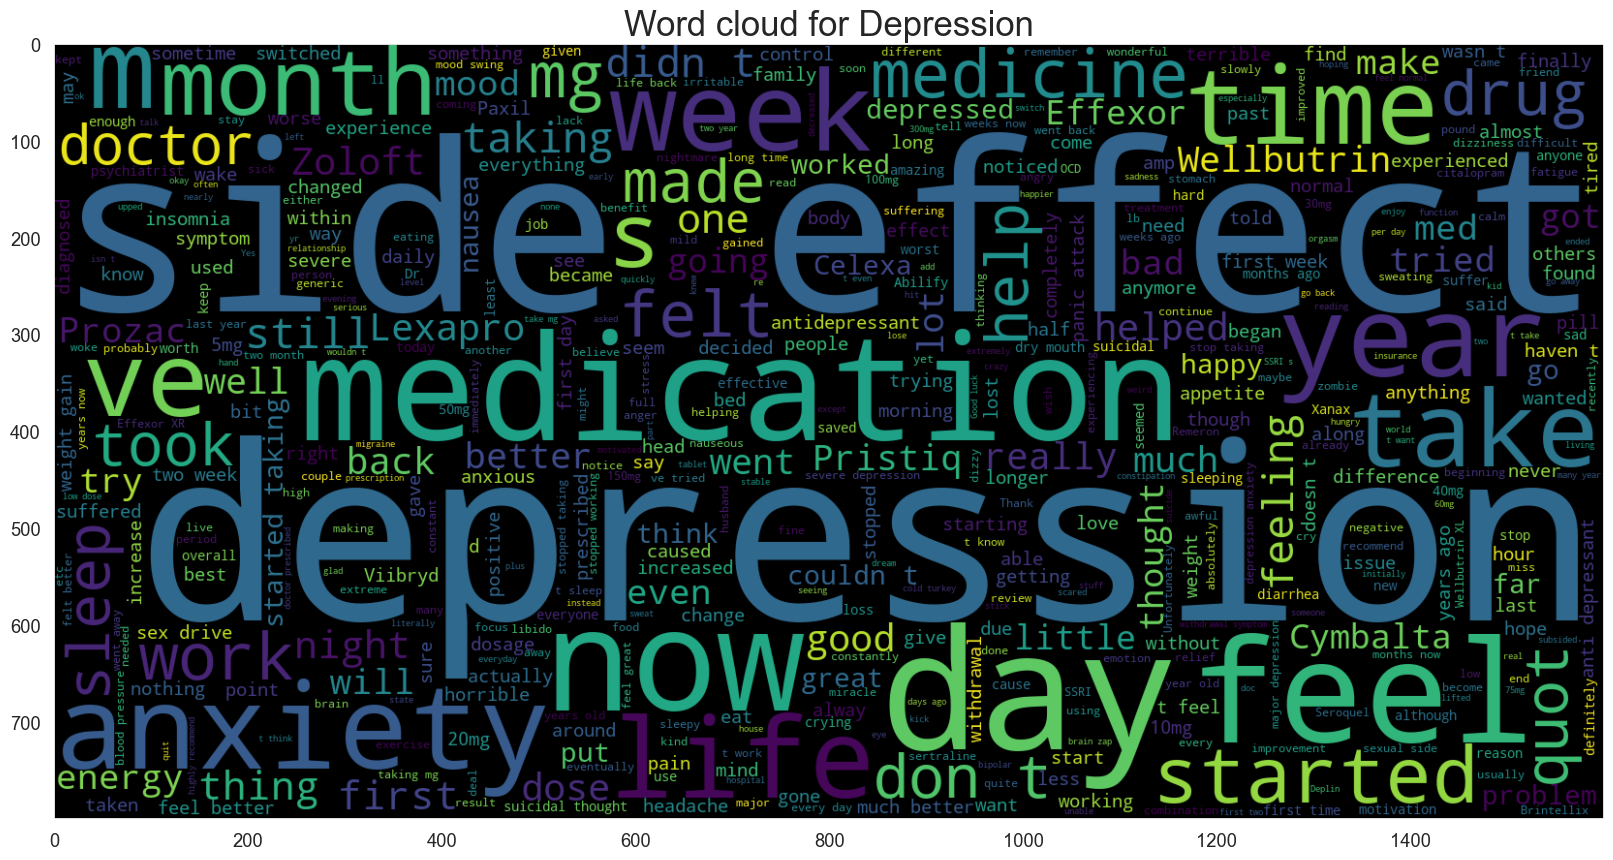

In [35]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=25)
plt.grid(None)

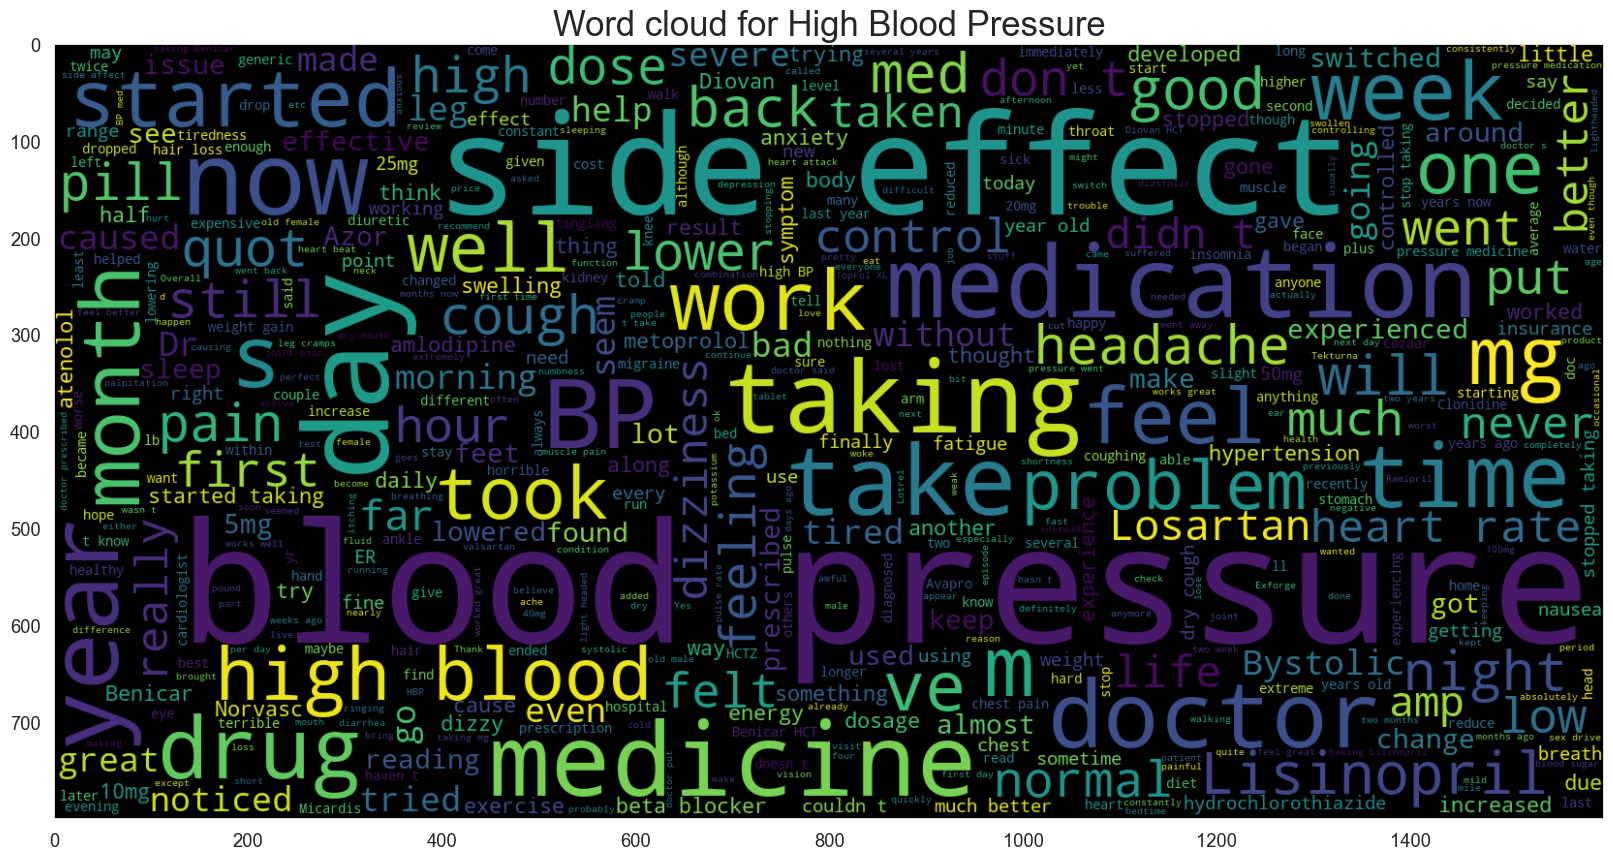

In [36]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=25)
plt.grid(None)

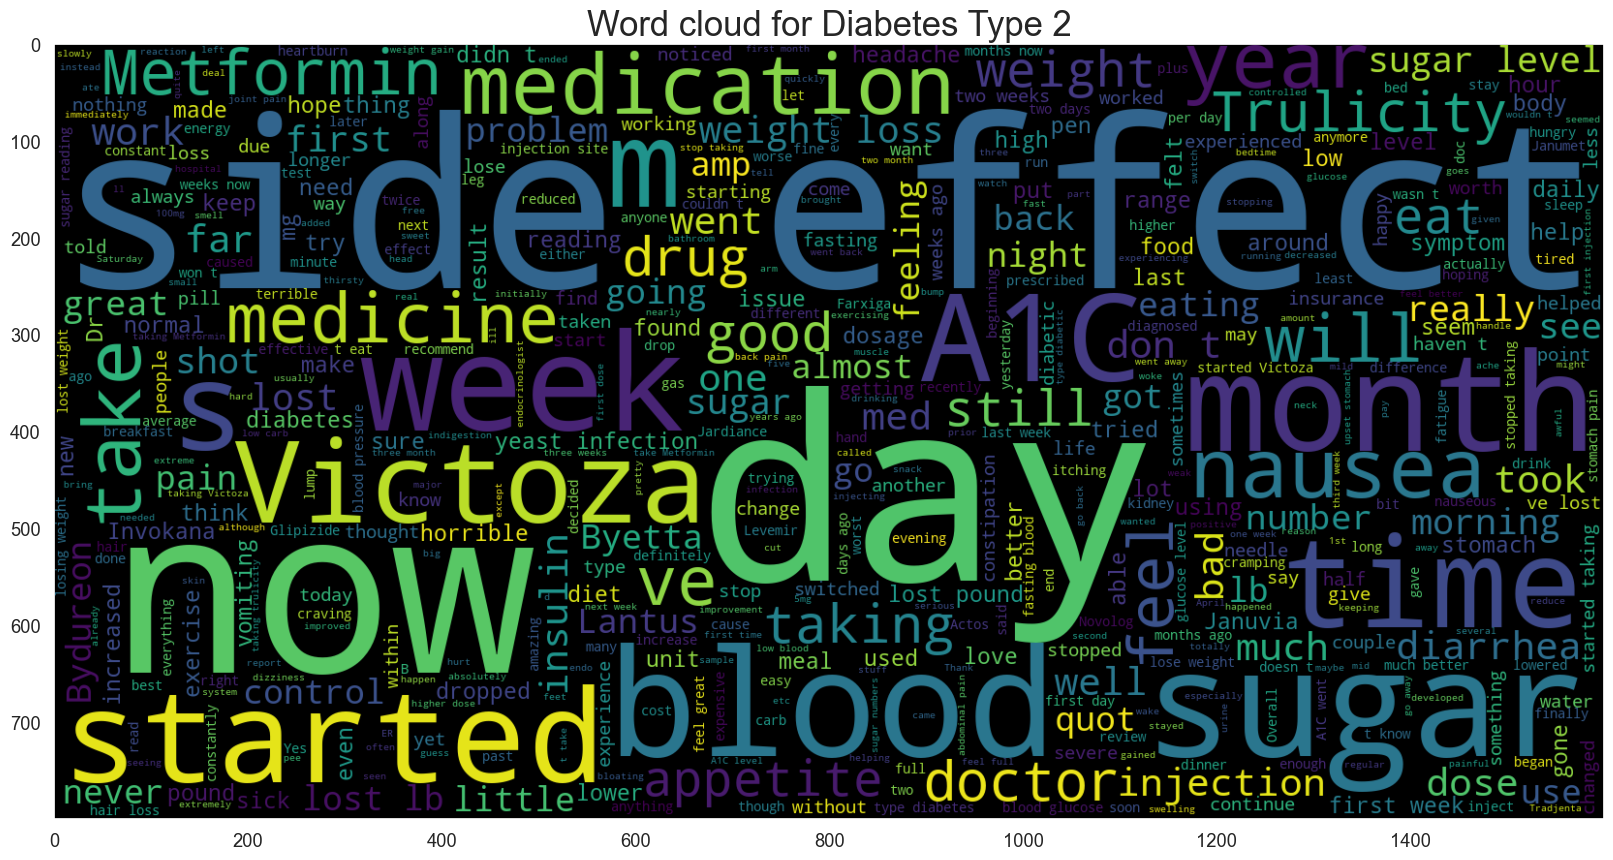

In [37]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=25)
plt.grid(None)

# Data Preprocessing

In [38]:
X.head(1)

drugName   condition  \
11  L-methylfolate  Depression   

                                               review  
11  "I have taken anti-depressants for years, with...

In [39]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [40]:
X.head()

drugName         condition  \
11  L-methylfolate  Depression         
31  Sertraline      Depression         
44  Venlafaxine     Depression         
50  Dulaglutide     Diabetes, Type 2   
67  Effexor XR      Depression         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                                                                                             
31  1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
44  my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better                                                          
50  Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I

In [41]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [42]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [43]:
from bs4 import BeautifulSoup
import re

In [44]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [45]:
X['review_clean'] = X['review'].apply(review_to_words)

In [46]:
X.head(1)

drugName   condition  \
11  L-methylfolate  Depression   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.   

                                                                                                                                                                                                                                                                                           review_clean  
11  taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect

# Creating features and Target Variable

In [47]:
X_feat=X['review_clean']
y=X['condition']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)
count_train

<11155x11173 sparse matrix of type '<class 'numpy.int64'>'
	with 329230 stored elements in Compressed Sparse Row format>

# Logistic Regression

0.9591251344567946
Confusion matrix, without normalization


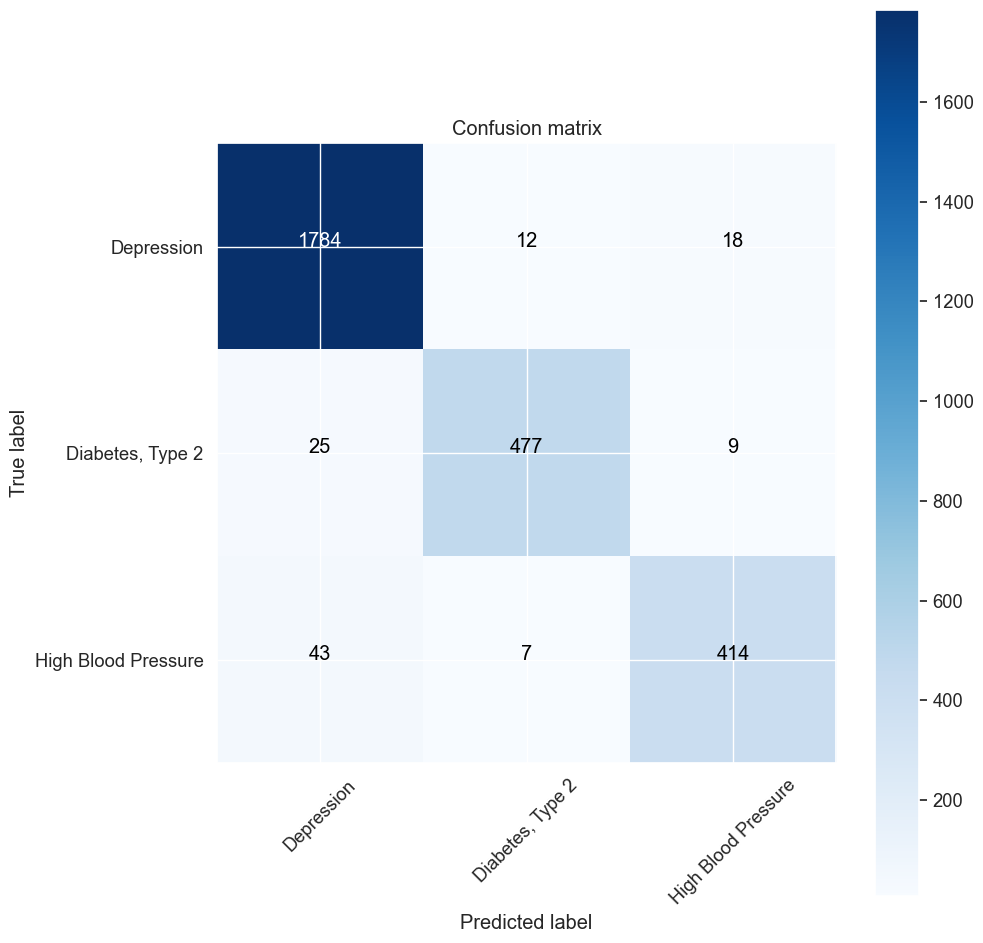

In [51]:
from sklearn import metrics
from sklearn import datasets, linear_model
reg = linear_model.LogisticRegression()
reg.fit(count_train, y_train)
pred = reg.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_LOG = score
print(Accuracy_LOG)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# MultinomialNB

0.9551810684833274
Confusion matrix, without normalization


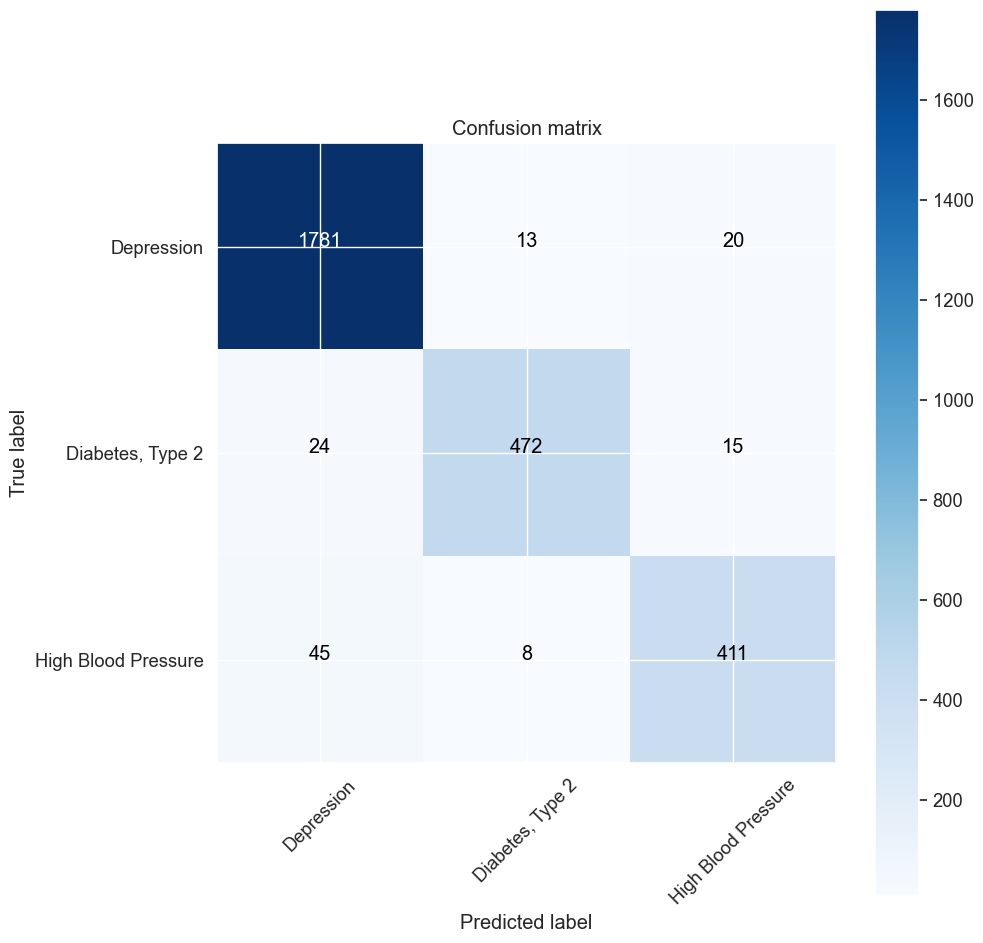

In [52]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_NB = score
print(Accuracy_NB)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# KNN

0.8017210469702403
Confusion matrix, without normalization


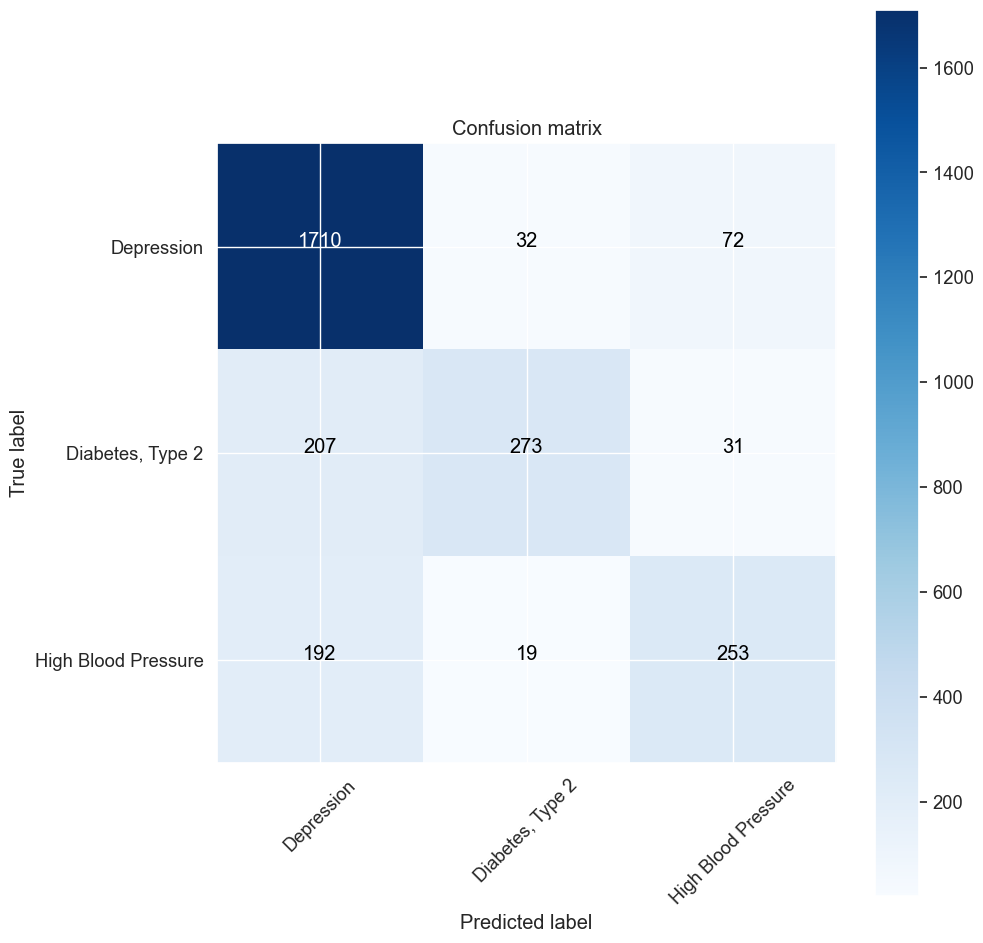

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(count_train, y_train)
pred = knn.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_KNN = score
print(Accuracy_KNN) 
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# Passive Aggressive Classifier

0.9530297597705271
Confusion matrix, without normalization


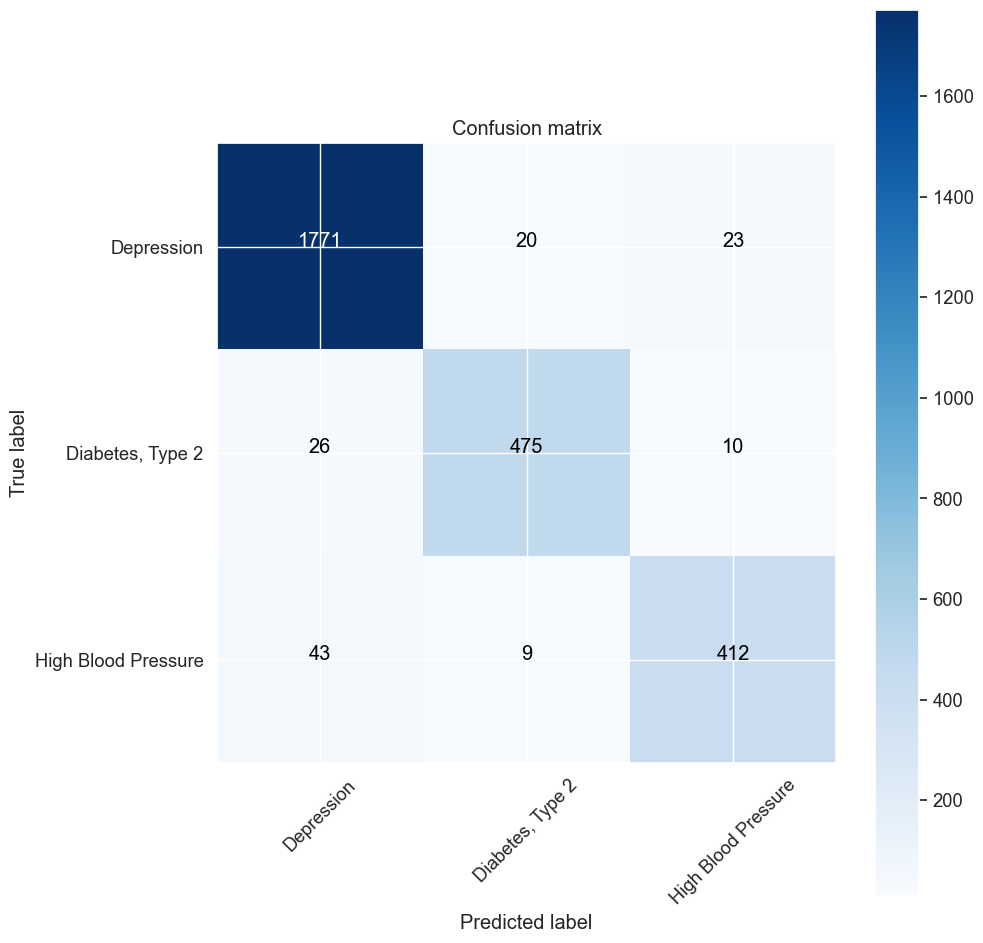

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_PAS = score
print(Accuracy_PAS)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# Decision Tree

0.942631767658659
Confusion matrix, without normalization


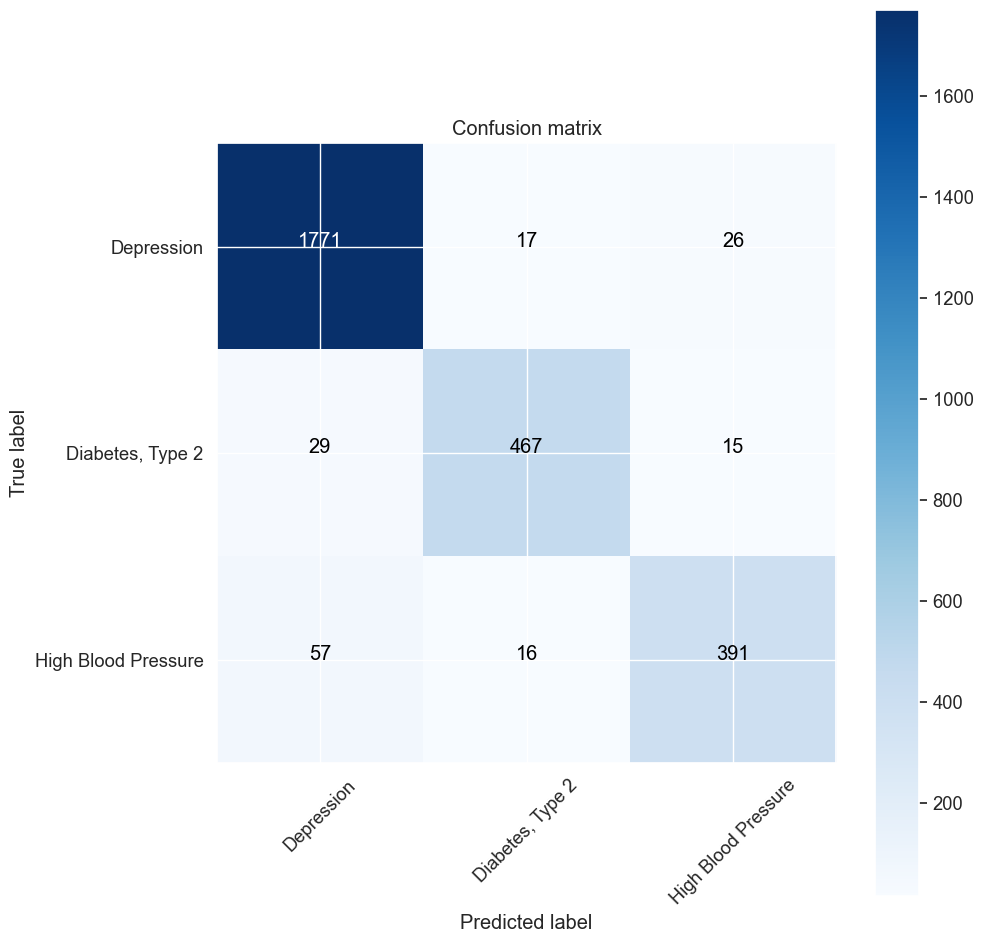

In [55]:
from sklearn.tree import DecisionTreeClassifier
passive = DecisionTreeClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_DT = score
print(Accuracy_DT)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# Random Forest

0.9645034062387953
Confusion matrix, without normalization


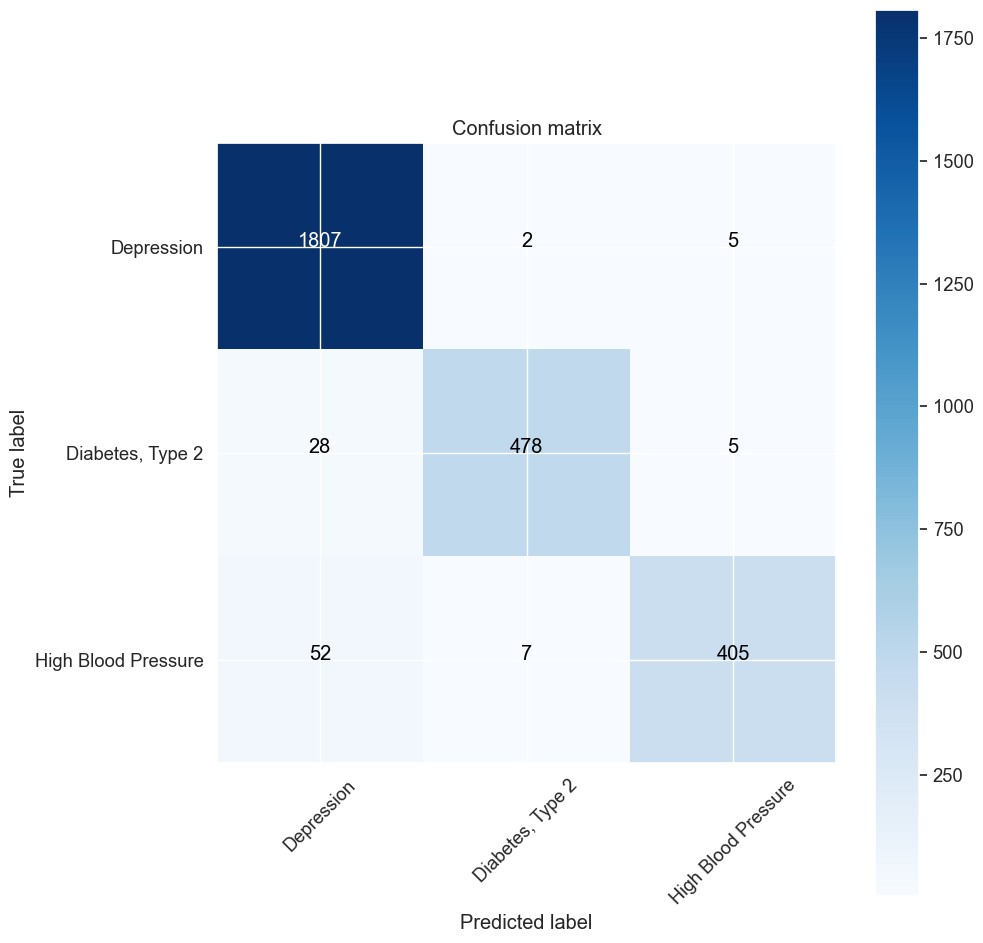

In [56]:
from sklearn.ensemble import RandomForestClassifier
passive = RandomForestClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Accuracy_RF = score
print(Accuracy_RF)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# SVM

0.945500179275726
Confusion matrix, without normalization


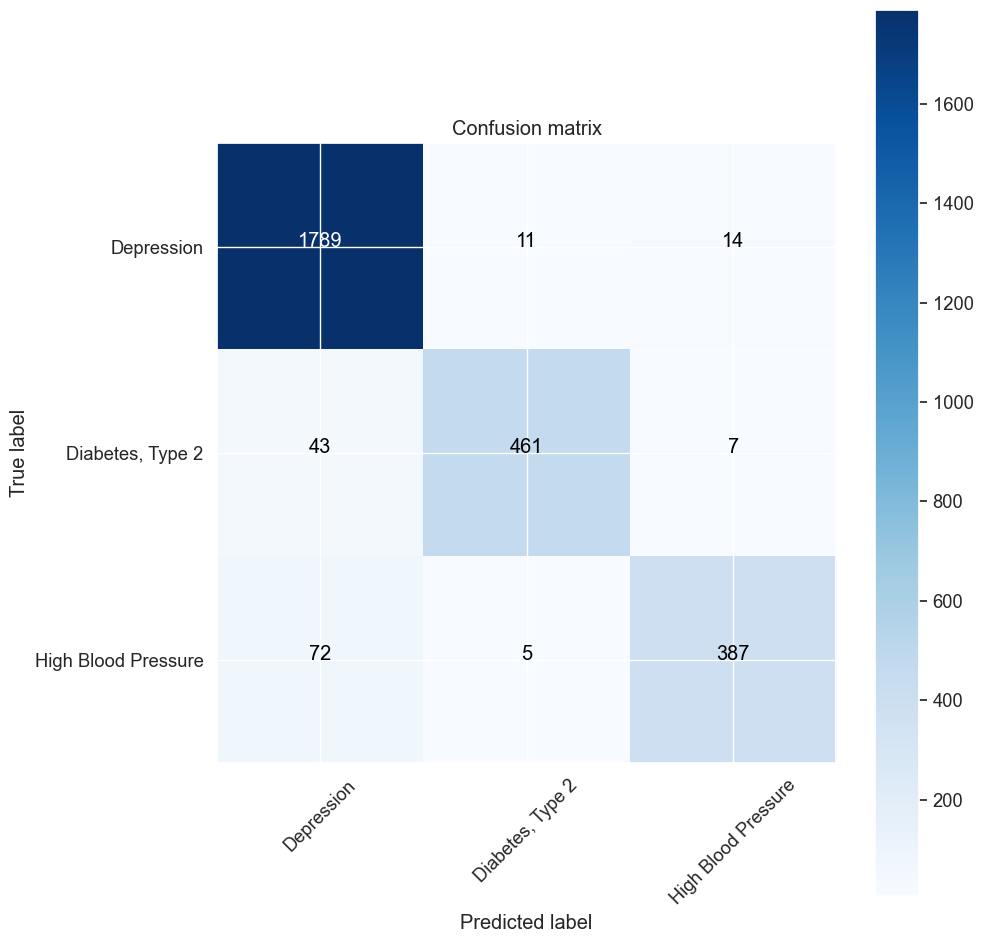

In [57]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(count_train, y_train)
pred = svc_model.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
Acuracy_SVM = score
print(Acuracy_SVM)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# Accuracy comparison

In [ ]:
Accuracy = [Accuracy_RF*100, Accuracy_DT*100, Accuracy_NB*100,Accuracy_KNN*100,score*100,Acuracy_SVM*100,Accuracy_LOG*100]
Methods = ['Random_Forest', 'Decision_Trees', 'Multinomial_Bayes','KNN','Passive_Aggressive','SVM', 'Logistic_Regression']

In [ ]:
comp = pd.DataFrame()
comp['Methods'] = Methods
comp['Accuracy'] = Accuracy
comp = comp.sort_values('Accuracy')
comp

# TFIDF-VECTORIZER

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf1 = RandomForestClassifier()
pass_tf1.fit(tfidf_train, y_train)
pred = pass_tf1.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

In [ ]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# Prediction

In [ ]:
text = X.review_clean[1105:1106]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf1.predict(test)[0]
pred1

In [ ]:
X.condition[1105:1106]

In [ ]:
X.drugName[1105:1106]

In [ ]:
drug_ratings = df[df["condition"] == pred1].groupby("drugName")["Unnamed: 0"].mean()
recommended_drugs = drug_ratings.nlargest(5).index.tolist()
print("Recommended Drugs based on ratings only:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

In [ ]:
drug_ratings = df[df["condition"] == pred1].groupby("drugName")["usefulCount"].mean()
recommended_drugs = drug_ratings.nlargest(1).index.tolist()
print("Recommended Drugs based on ratings only:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

# Pickle


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(passive, f)

In [ ]:
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)